<h1><center><a id='2'><font size="5">Yuzarifki Alfan Zuhdhi | 09011381722101 | Sistem Komputer | UAS AI </font></a>
</center></h1>
 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<h1><center><a id='2'><font size="5">Honey Bee Subspecies Classification menggunakan Convolutional Neural Network</font></a></center></h1>

# <a id='0'>ISI</a>

- <a href='#1'>PENDAHULUAN</a>  
- <a href='#2'>DATASETS</a>  
 - <a href='#21'>Memasukan modul/library</a>  
 - <a href='#21'>Memasukan data</a>    
- <a href='#3'>PROEPOSESSING DATA</a>   
 - <a href='#31'>Cek data hilang</a>  
 - <a href='#32'>Cek data gambar</a>  
 - <a href='#33'>Lokasi</a>  
 - <a href='#34'>Tanggal dan waktu</a>  
 - <a href='#35'>Subspecies</a>  
  - <a href='#36'>Kesehatan</a>  
  - <a href='#37'>Pollen carrying</a>  
  - <a href='#38'>Caste</a>  
- <a href='#4'>CONVOLUTIONAL NEURAL NETWORK</a>  
 - <a href='#40'>Splitting data</a>  
 - <a href='#41'>Membangun model baseline</a>  
 - <a href='#42'>Evaluasi model</a>    
 - <a href='#43'>Tambahkan dropout</a>  
 - <a href='#44'>Perbaikan model</a>  
- <a href='#6'>KESIMPULAN</a>  
- <a href='#7'>CATATAN</a>

# <a id='1'>Pendahuluan</a>  


<div class="alert alert-info">

<b>CASE</b> :

 <ul>
  <li>Dalam klasifikasi ini akan dieksplorasi dataset dengan gambar lebah yang diambil dari berbagai lokasi di AS, ditangkap selama beberapa bulan selama 2018, pada jam yang berbeda, dari berbagai subspesies lebah, dan dengan berbagai masalah kesehatan.

Tujuan dari Klasifikasi ini adalah untuk menganalisis langkah-langkah pembelajaran mesin, terkhusus CNN.
Kami mulai dengan menyiapkan analisis (memuat library dan data), melanjutkan dengan Analisis Data Eksplorasi (EDA) di mana disoroti berbagai fitur data, meluangkan waktu untuk mencoba memahami data dan juga mendapatkan ide tentang berbagai fitur potensi prediksi dan korelasi dengan fitur-fitur lainnya.
Kemudian visualisasi data dan persiapan untuk pembuatan model. Dataset dibagi dalam pelatihan, validasi, dan set tes. Dimulai dengan sebuah model sederhana untuk mengklasifikasikan subspesies lebah.
Moduel dievalusi, menampilkan perkiraan kesalahan dan akurasi pelatihan dan juga kesalahan validasi dan akurasi. Dengan ini, dan dengan perkiraan dari apa yang akan menjadi tingkat kesalahan (manusia) untuk klasifikasi lebah subspesies, maka diputuskan bagaimana meningkatakan pembelajaran mesin untuk pekerjaan klasifikasi gambar. Jika pada awalnya model memiliki bias yang tinggi, maka dicoba terlebih dahulu untuk meningkatkan model sehingga akan mempelajari lebih baik dataset gambar. Jika kita memiliki bias kecil tetapi varians besar (model belajar dengan baik data pelatihan tetapi gagal untuk menggeneralisasi, itu berarti model kita overfitting. Berdasarkan jenis pengamatan ini, kita membuat keputusan untuk bagaimana menyesuaikan model.Kami menjalankan beberapa model dengan perbaikan yang diputuskan berdasarkan analisis atau kesalahan dan akurasi dan kami memutuskan di akhir untuk model akhir. Model ini akan digunakan untuk klasifikasi segar, data baru, tidak digunakan untuk pelatihan atau validasi, set tes..</li>
</ul>
</div>

# <a id='2'>DATASETS</a>   


Before starting the analysis, we need to make few preparation: load the packages, load and inspect the data.



# <a id='21'>Memasukan model/library</a>

Dibawah ini adalah modul/library yang digunakan dalam klasifikasi subspecies lebah menggunakan cnn kali ini.


In [54]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import imageio
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
import tensorflow

<div class="alert alert-warning">

<b>Import library yang digunakan dalam CNN</b> 

 <ul>
  <li>1.<a id='21'> Pandas </a> digunakan untuk mengimport dataset, visualisasi dataset dan lain lain.</li>
  <li>2.<a id='21'> Numpy </a>  berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array dan array multidimensi yang akan dikelola berdasarkan dataset</a></li>
  <li>3.<a id='21'> Pathlib </a> digunakan untuk load gambar.</li>
  <li>4.<a id='21'> Skimage </a> digunakan untuk image processing.</li>
  <li>5.<a id='21'> Matplotlib </a> digunakan untuk membantu memvisualisasikan data dengan lebih indah dan rapi.Ada plot untuk menampilkan data secara 2D atau 3D. Sehingga dapat menampilkan data yang telah diolah sesuai kebutuhan.</li>
  <li><a id='21'>6. Seaborn </a> digunakan untuk visualisasi data interaktif, agar dataset lebih mudah dimengerti dan dipahami</li>
  <li><a id='21'>7. plotly </a> sama hal nya dengan seaborn dan matplotlib, ploty digunakan untuk visualisasi dataset agar terlihat berkualitas, plot yang bisa dibuat menggunakan plotly antara lain line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts. Plotly harus terhubung ke internet agar gambar terlihat. Karena sistem plotly adalah realtime</li>
  <li><a id='21'>8. Scipy </a> Kegunaanya adalah untuk menangani operasi aljabar dan matriks serta operasi matematika lainya. Disini dapat menangani sejumlah operasi matematika yang lebih kompleks daripada menggunakan library math bawaan Python. </li>
  <li><a id='21'>9. Sklearn </a> Machine learning ada yang berbasis statistika. Ini adalah inti dari pembuatan CNN pada python, Sklearn pada kasus ini memakai fungsi split data dan metrics</li>
  <li><a id='21'>10. Keras </a> Keras adalah high-level neural network API yang dikembangkan dengan Python dengan fokus tujuan untuk mempercepat proses riset atau percobaan.Pada percobaan kali ini keras memakai backend <a id='21'> tensorflow  </a> dan memakai fungsi <a id='21'> optimizer </a>, dengan model <a id='21'>  sequential </a>. Untuk pemakaian CNN fungsi fungsi yang digunakan dari keras antara lain <a id='21'>  Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU, ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler </a>. Sedangkan untuk preposessing gambar digunakan <a id='21'> ImageDataGenerator</a> </li>
  <li>11.<a id='21'> OS </a> digunakan untuk melihat lokasi dataset.</li>
  
</ul>
</div>

In [55]:
IMAGE_PATH = 'bee_imgs/bee_imgs/'
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNELS = 3
RANDOM_STATE = 2018
TEST_SIZE = 0.2
VAL_SIZE = 0.2
CONV_2D_DIM_1 = 16
CONV_2D_DIM_2 = 16
CONV_2D_DIM_3 = 32
CONV_2D_DIM_4 = 64
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
BATCH_SIZE = 32
NO_EPOCHS_1 = 5
NO_EPOCHS_2 = 10
NO_EPOCHS_3 = 50
PATIENCE = 5
VERBOSE = 1

<div class="alert alert-warning">

<b>Memasukan data gambar dari direktor lokal dan membuat variabel untuk model CNN</b> 

 <ul>
  <li> Memasukan gambar ke dalam notebook dan <a id='21'> ukuran test, ukuran validasi, ukuran gambar, batch, epoch percobaan ke-1,2,3, verbose </a> dan lain lain. </li>
  
</ul>
</div>

# <a id='22'>Memasukan dataset</a>  

Dataset dalam bentuk excel dan image dimasukan ke dalam notebook

In [70]:
honey_bee_df=pd.read_csv('bee_data.csv')

In [71]:
honey_bee_df.shape

(5172, 9)

<div class="alert alert-warning">

<b>Memasukan dataset lebah (csv) dari direktor lokal</b> 

 <ul>
  <li>Memasukan dataset lebah ke dalam variabel <a id='21'> "honey_bee_df" </a> menggunakan pandas </li>
  <li>Mlihat baris dan kolom dataset lebah dengan <a id='21'> .shape </a> menggunakan pandas. Diketahui ukuran dataset 5172 x 9 </li>
</ul>
</div>

In [72]:
honey_bee_df.sample(100).head()

file     date   time              location  zip code  \
3270  015_310.png   8/6/18  13:19     Saratoga, CA, USA     95070   
2916  010_542.png  8/19/18  12:46   Des Moines, IA, USA     50315   
3245  015_265.png   8/6/18  13:19     Saratoga, CA, USA     95070   
623   008_297.png  8/16/18   8:20  New Orleans, LA, USA     70115   
3941  032_772.png  8/21/18   9:00   Des Moines, IA, USA     50315   

                 subspecies   health  pollen_carrying   caste  
3270      Italian honey bee  healthy            False  worker  
2916    Carniolan honey bee  healthy            False  worker  
3245      Italian honey bee  healthy            False  worker  
623   VSH Italian honey bee  healthy            False  worker  
3941      Russian honey bee  healthy            False  worker

<div class="alert alert-warning">

<b>Penjelasan kolom pada dataset</b> 

 <ul>
  <li>1. <a id='21'> File </a> nama file image.</li>
  <li>2. <a id='21'> Date </a> Tanggal gambar diambil.</li>
  <li>3. <a id='21'> Time </a> Waktu saat gambar diambil.</li>
  <li>4. <a id='21'> Location </a> Lokasi di US dengan kota, state dan nama negara.</li>
  <li>5. <a id='21'> Zip code </a> kode zip area.</li>
  <li>6. <a id='21'> Subspecies </a> Nama species lebah.</li>
  <li>7. <a id='21'> Health </a> Kesehatan lebah.</li>
  <li>8. <a id='21'> Pollen-carrying </a> Indikasi gambar dengan serbuk sari.</li>
  <li>9. <a id='21'> Caste </a> Kasta atau status lebah.</li>
</ul>
</div>

# <a id='3'>PREPOSESSING DATA</a>  


Cek data hilang, data tidak berlabel dan label data yang tidak konsisten.

## <a id='31'>Cek data hilang</a>  

In [73]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(honey_bee_df)

Total  Percent
caste                0      0.0
pollen_carrying      0      0.0
health               0      0.0
subspecies           0      0.0
zip code             0      0.0
location             0      0.0
time                 0      0.0
date                 0      0.0
file                 0      0.0

<div class="alert alert-warning">

<b>Penjelasan kolom pada dataset</b> 

 <ul>
  <li>Dapat dilihat hasil dari pengecekan data hilang diatas, tidak ada missing data yang terjadi.</li>
</ul>
</div>

## <a id='32'>Cek data gambar</a>  

Memeriksa data gambar pada folder

In [74]:
image_files = list(os.listdir(IMAGE_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 5172


In [75]:
file_names = list(honey_bee_df['file'])
print("Matching image names: {}".format(len(set(file_names).intersection(image_files))))

Matching image names: 5172


<div class="alert alert-warning">

<b>Cek data gambar</b> 

 <ul>
  <li>Jumlah gambar didapat dari pengecekan ada 5172, lalu dicocokan dengan dataset yang sudah diimport dan hasil cocok yaitu 5172</li>
</ul>
</div>

In [76]:
def read_image_sizes(file_name):
    image = skimage.io.imread(IMAGE_PATH + file_name)
    return list(image.shape)

<div class="alert alert-warning">

<b>Membuat definisi read_image_sizes</b> 

 <ul>
  <li>Membuat variabel image agar dapat membaca gambar dari folder yang sudah diimasukan ke notebook dengan skimage.</li>
</ul>
</div>

In [77]:
m = np.stack(honey_bee_df['file'].apply(read_image_sizes))
df = pd.DataFrame(m,columns=['w','h','c'])
honey_bee_df = pd.concat([honey_bee_df,df],axis=1, sort=False)

<div class="alert alert-warning">

<b>Membuat ukuran gambar</b> 

 <ul>
  <li>Mengatur lebar, tinggi dengan 'w' dan 'h' lalu posisi 'c'= centre</li>
</ul>
</div>

In [78]:
traceW = go.Box(
    x = honey_bee_df['w'],
    name="Lebar",
     marker=dict(
                color='rgba(238,23,11,0.5)',
                line=dict(
                    color='red',
                    width=1.2),
            ),
    orientation='h')
traceH = go.Box(
    x = honey_bee_df['h'],
    name="Tinggi",
    marker=dict(
                color='rgba(11,23,245,0.5)',
                line=dict(
                    color='blue',
                    width=1.2),
            ),
    orientation='h')
data = [traceW, traceH]
layout = dict(title = 'Lebar & tinggi gambar',
          xaxis = dict(title = 'Ukuran', showticklabels=True), 
          yaxis = dict(title = 'dimensi gambar'),
          hovermode = 'closest',
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='width-height')

<div class="alert alert-warning">

<b>Plotting ukuran lebar dan tinggi gambar</b> 

 <ul>
  <li>Merah lebar dan biru tinggi</li>
</ul>
</div>

## <a id='33'>Lokasi</a>  

Cek lokasi gambar. Membuat tabel dengan `location` and `zip code` sebagai group.

In [79]:
tmp = honey_bee_df.groupby(['zip code'])['location'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

zip code              location  Images
0      3431        Keene, NH, USA      92
1     30607       Athens, GA, USA     579
2     30607  Athens, Georgia, USA     472
3     50315   Des Moines, IA, USA     973
4     70115  New Orleans, LA, USA     170
5     77511        Alvin, TX, USA     737
6     95070     Saratoga, CA, USA    2000
7     95124     San Jose, CA, USA     149

<div class="alert alert-warning">

<b>Banyak lebah per daerah</b> 

 <ul>
    <li>Pada tabel diatas dapat dilihat <a id='21'> Athens, GA, USA </a> dan <a id='21'> Athens, Georgia, USA </a> adalah lokasi yang sama. Dapat dilihat Zip codenya, maka data dengan lokasi sama seperti ini harus diubah.</li>
</ul>
</div>

In [80]:
honey_bee_df = honey_bee_df.replace({'location':'Athens, Georgia, USA'}, 'Athens, GA, USA')

<div class="alert alert-warning">

<b>Me-replace Athens, georgia ke Athens, GA</b> 

 <ul>
    <li>Ini bertujuan agar tidak ada salah perhitungan saat nanti masuk ke model CNN.</li>
</ul>
</div>

In [81]:
tmp = honey_bee_df.groupby(['zip code'])['location'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df['code'] = df['location'].map(lambda x: x.split(',', 2)[1])
df

zip code              location  Images code
0      3431        Keene, NH, USA      92   NH
1     30607       Athens, GA, USA    1051   GA
2     50315   Des Moines, IA, USA     973   IA
3     70115  New Orleans, LA, USA     170   LA
4     77511        Alvin, TX, USA     737   TX
5     95070     Saratoga, CA, USA    2000   CA
6     95124     San Jose, CA, USA     149   CA

<div class="alert alert-warning">

<b>Hasil replace data</b> 

In [84]:
trace = go.Bar(
        x = df['location'],
        y = df['Images'],
        marker=dict(color="yellow"),
        text=df['location']
    )
data = [trace]
    
layout = dict(title = 'Banyak gambar per-lokasi',
          xaxis = dict(title = 'Subspecies', showticklabels=True, tickangle=15), 
          yaxis = dict(title = 'Banyak gambar'),
          hovermode = 'closest'
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-location')

<div class="alert alert-warning">

<b>Visualisasi data lokasi menggunakan plotly.</b> 

 <ul>
    <li>Di lokasi <a id='21'> Saratoga, California </a> terdapat 2000 images dimana ini merupakan yang tertinggi sedangkan <a id='21'> Athens, Georgia </a> berada di tempat kedua dengan 1051 images .</li>
</ul>
</div>

In [85]:
#List lokasi
locations = (honey_bee_df.groupby(['location'])['location'].nunique()).index

In [86]:
def draw_category_images(var,cols=5):
    categories = (honey_bee_df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    # Nomor gambar lokasi
    for i, cat in enumerate(categories):
        sample = honey_bee_df[honey_bee_df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMAGE_PATH + sample.iloc[j]['file']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

<div class="alert alert-warning">

<b>Menampilkan gambar lebah berdasarkan lokasi.</b> 

 <ul>
    <li>Variabel locations dibuat berdasarkan group lokasi, kemudia dibuat fungsi draw_category_images untuk menampilkan gambar lebar dan nama lokasi</li>
    <li>Gambar ditampilkan masing-masing 5 per daerah (cols=5)</li>
</ul>
</div>

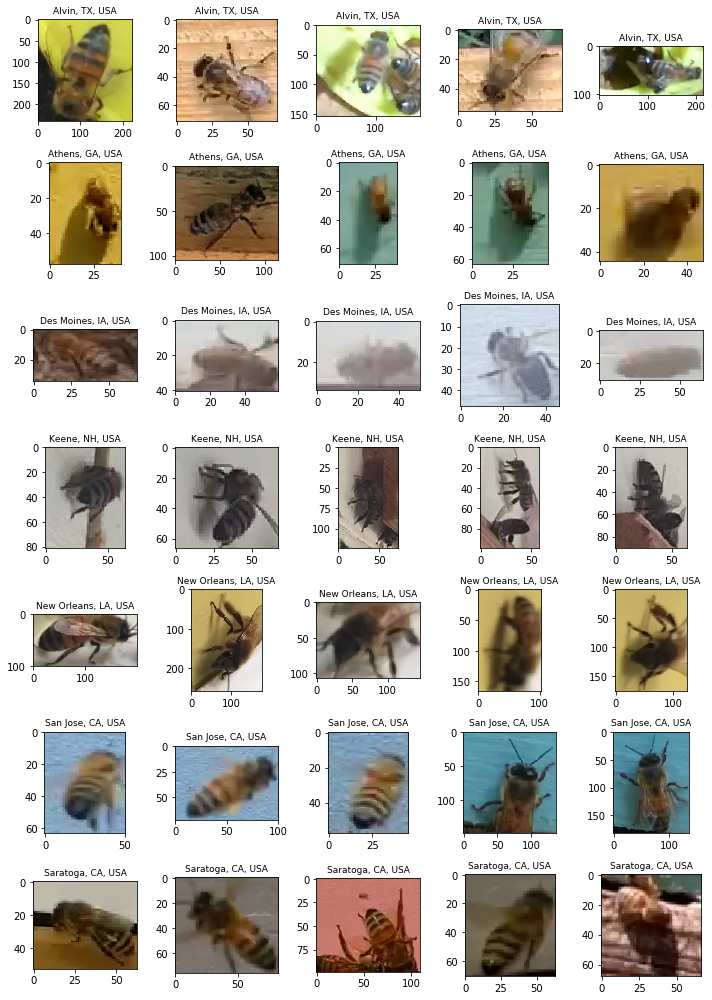

In [87]:
draw_category_images("location")

<div class="alert alert-warning">

<b>Hasil gambar.</b> 

## <a id='34'>Waktu dan tanggal</a>   

Konversi tanggal ke waktu tahun, bulan, hari, jam dan menit

In [88]:
honey_bee_df['date_time'] = pd.to_datetime(honey_bee_df['date'] + ' ' + honey_bee_df['time'])
honey_bee_df["year"] = honey_bee_df['date_time'].dt.year
honey_bee_df["month"] = honey_bee_df['date_time'].dt.month
honey_bee_df["day"] = honey_bee_df['date_time'].dt.day
honey_bee_df["hour"] = honey_bee_df['date_time'].dt.hour
honey_bee_df["minute"] = honey_bee_df['date_time'].dt.minute

<div class="alert alert-warning">

<b>Menampilkan gambar lebah berdasarkan waktu.</b> 

 <ul>
    <li>Membuat varianbel tahun, bulan, hari, jam dan menit untuk plotting sebaran data lebah</li>
</ul>
</div>

In [89]:
tmp = honey_bee_df.groupby(['date_time', 'hour'])['location'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Date/time: {}<br>'+
                      'Jam: {}<br>'+
                      'Lokasi: {}<br>'+
                      'Gambar: {}').format(row['date_time'],
                                            row['hour'],
                                            row['location'],
                                            row['Images']))
df['hover_text'] = hover_text
locations = (honey_bee_df.groupby(['location'])['location'].nunique()).index
data = []
for location in locations:
    dfL = df[df['location']==location]
    trace = go.Scatter(
        x = dfL['date_time'],y = dfL['hour'],
        name=location,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=0.2,
            size=dfL['Images'],
            line=dict(
                width=2
            ),),
        mode = "markers",
        text=dfL['hover_text'],
    )
    data.append(trace)
    
layout = dict(title = 'Jumlah gambar lebah per tanggal, jam dan lokasi',
          xaxis = dict(title = 'Date', showticklabels=True), 
          yaxis = dict(title = 'Hour'),
          hovermode = 'closest'
         )
fig = dict(data = data, layout = layout)

iplot(fig, filename='images-date_time')

<div class="alert alert-warning">

<b>Hasil plotting sebaran data tahun, bulan, jam dan menit.</b> 

 <ul>
    <li>informasi yang didapat setelah plotting waktu menggunakan ploty adalah tahun, bulan, jam dan menit saat pengambilan gambar lebah dan juga tahu berapa banyak gambar yang diambil dalam satu waktu, contoh pada 8 September 2018 jam 16.08 gambar yang diambil sebanyak 23. Dengan menggunakan ploty, hanya perlu arahkan kursor ke plot diatas lalu akan muncul informasi gambar. Penggunaan ploty sangat membantu dalam visualisasi dataset. Tujuan visualisasi ini untuk melihat bagaimana sebaran data pengambilan gambar lebah.</li>
</ul>
</div>

### Contoh penggunaan ploty untuk melihat sebaran data
![](gambar.PNG)

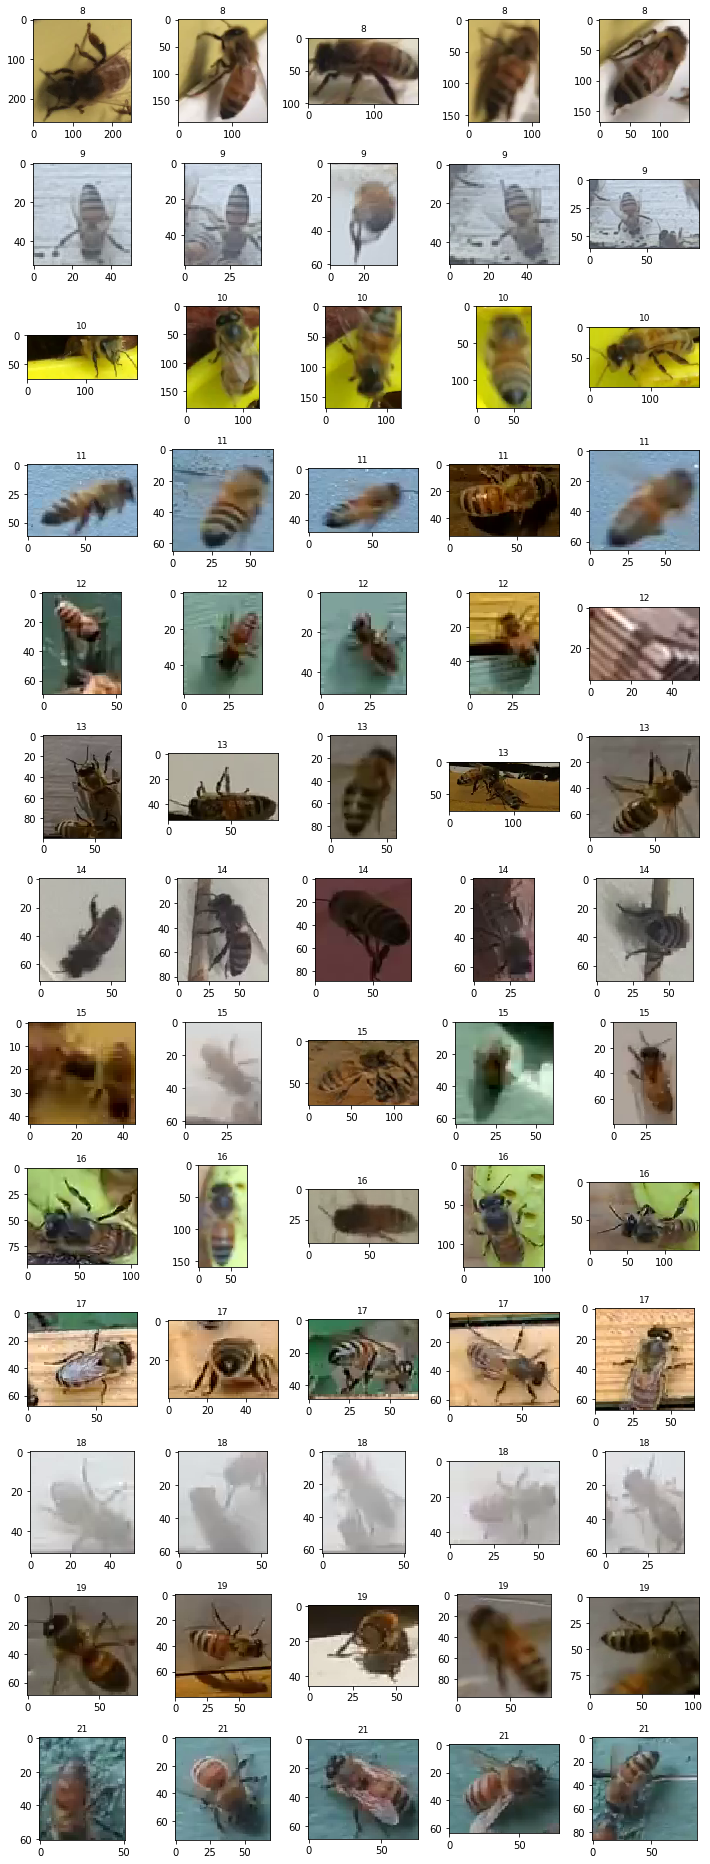

In [90]:
draw_category_images("hour")

<div class="alert alert-warning">

<b>Gambar lebah berdasarkan jam pengambilan.</b> 

## <a id='34'>Subspecies</a>   

Plotting subspecies distribusi.

In [91]:
tmp = honey_bee_df.groupby(['subspecies'])['year'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

subspecies  year  Images
0                     -1  2018     428
1  1 Mixed local stock 2  2018     472
2    Carniolan honey bee  2018     501
3      Italian honey bee  2018    3008
4      Russian honey bee  2018     527
5  VSH Italian honey bee  2018     199
6      Western honey bee  2018      37

<div class="alert alert-warning">

<b>7 subspecies</b> 

 <ul>
    <li>-1 merupakan subspecies yang belum bisa di identifikasi</li>
</ul>
</div>

In [128]:
trace = go.Bar(
        x = df['subspecies'],
        y = df['Images'],
        marker=dict(color="Magenta"),
        text=df['subspecies']
    )
data = [trace]
    
layout = dict(title = 'Banyak lebah per subspecies',
          xaxis = dict(title = 'Subspecies', showticklabels=True, tickangle=15), 
          yaxis = dict(title = 'Banyak gambar'),
          hovermode = 'closest'
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-subspecies')

<div class="alert alert-warning">

<b>Menampilkan banyak subspecies</b> 

 <ul>
    <li>Pada grafik diatas Italian honey bee merupakan subspecies paling banyak (3008) dalam dataset.</li>
    <li>Sedangkan Western honey bee (37) adalah subspecies paling sedikit.</li>
</ul>
</div>

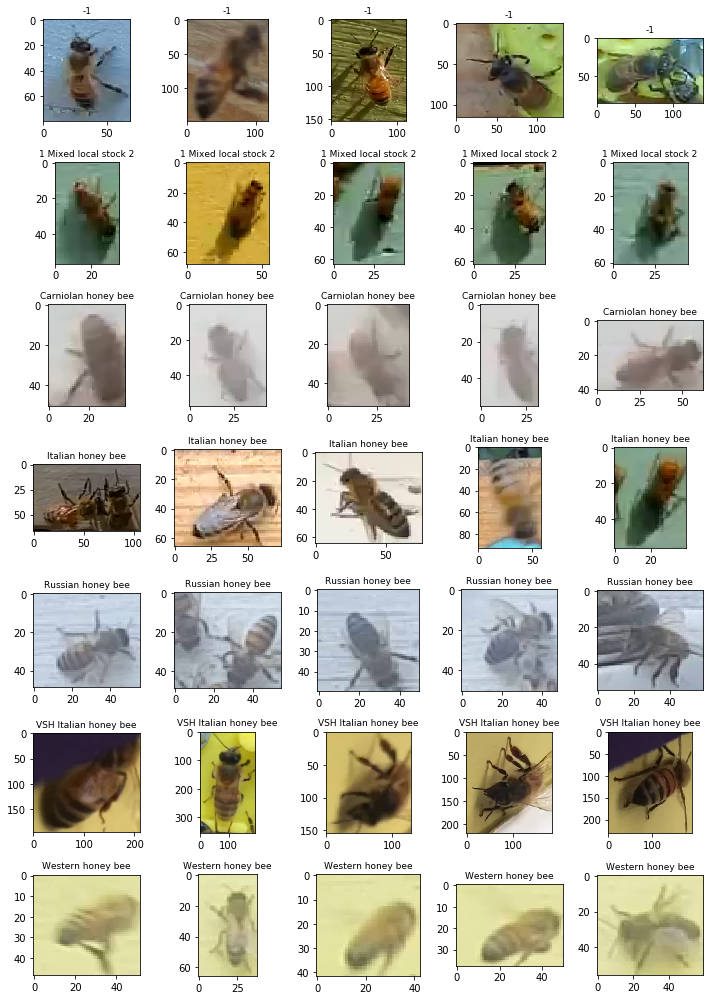

In [129]:
draw_category_images("subspecies")

<div class="alert alert-warning">

<b>Menampilkan gambar subspecies</b> 

### Subspecies perlokasi

In [130]:
tmp = honey_bee_df.groupby(['subspecies'])['location'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()

In [131]:
piv = pd.pivot_table(df, values="Images",index=["subspecies"], columns=["location"], fill_value=0)
m = piv.values

In [133]:
trace = go.Heatmap(z = m, y= list(piv.index), x=list(piv.columns),colorscale='Rainbow',reversescale=False)
    
data=[trace]
layout = dict(title = "Banyak gambar per-lokasi dan subspecies",
              xaxis = dict(title = 'Lokasi',
                        showticklabels=True,
                           tickangle = 45,
                        tickfont=dict(
                                size=10,
                                color='black'),
                          ),
              yaxis = dict(title = 'Subspecies', 
                        showticklabels=True, 
                           tickangle = 45,
                        tickfont=dict(
                            size=10,
                            color='black'),
                      ), 
              hovermode = 'closest',
              showlegend=False,
                  width=600,
                  height=600,
             )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-location_subspecies')

<div class="alert alert-warning">

<b>Menampilkan subspecies perlokasi dengan heatmap</b> 

 <ul>
    <li>Pada heatmap diatas dapat dilihat bahwa sebaran lebah perlokasi sangat variatif, contohnya italian honey bee memiliki 3008 gambar, 457 berada di Alvin, 579 berada di athens dan 1972 beada di saratoga.</li>
    <li>Warna pada heatmap melambangkan banyak objek, dimana ungu berarti 0 dan seterusnya bisa dilihat pada plotting diatas</li>
</ul>
</div>

### Subspecies perjam

In [134]:
tmp = honey_bee_df.groupby(['subspecies'])['hour'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()

In [135]:
piv = pd.pivot_table(df, values="Images",index=["subspecies"], columns=["hour"], fill_value=0)
m = piv.values

In [136]:
trace = go.Heatmap(z = m, y= list(piv.index), x=list(piv.columns),colorscale='Rainbow',reversescale=False)
    
data=[trace]
layout = dict(title = "Banyak gambar per-subspecies dan jam",
              xaxis = dict(title = 'Jam',
                        showticklabels=True,
                           tickangle = 0,
                        tickfont=dict(
                                size=10,
                                color='black'),
                          ),
              yaxis = dict(title = 'Subspecies', 
                        showticklabels=True, 
                           tickangle = 45,
                        tickfont=dict(
                            size=10,
                            color='black'),
                      ), 
              hovermode = 'closest',
              showlegend=False,
                  width=600,
                  height=600,
             )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-location_subspecies')

<div class="alert alert-warning">

<b>Menampilkan subspecies perjam dengan heatmap</b> 

 <ul>
    <li>Pada heatmap diatas menampilkan sebaran lebah perjam.</li>
    <li>Untuk italian honey bee diambil pada pukul 13 sebanyak 909 gambar.</li>
</ul>
</div>

### Subspecies perukuran gambar

In [137]:
def draw_trace_box(dataset,var, subspecies):
    dfS = dataset[dataset['subspecies']==subspecies];
    trace = go.Box(
        x = dfS[var],
        name=subspecies,
        marker=dict(
                    line=dict(
                        color='black',
                        width=0.8),
                ),
        text=dfS['subspecies'], 
        orientation = 'h'
    )
    return trace

subspecies = (honey_bee_df.groupby(['subspecies'])['subspecies'].nunique()).index
def draw_group(dataset, var, title,height=500):
    data = list()
    for subs in subspecies:
        data.append(draw_trace_box(dataset, var, subs))
        
    layout = dict(title = title,
              xaxis = dict(title = 'Ukuran',showticklabels=True),
              yaxis = dict(title = 'Subspecies', showticklabels=True, tickfont=dict(
                family='Old Standard TT, serif',
                size=8,
                color='black'),), 
              hovermode = 'closest',
              showlegend=False,
                  width=600,
                  height=height,
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='subspecies-image')


draw_group(honey_bee_df, 'w', "Lebar gambar per-subspecies")
draw_group(honey_bee_df, 'h', "Tinggi gambar per-subspecies")

<div class="alert alert-warning">

<b>Menampilkan subspecies perukuran gambar dengan boxplot</b> 

 <ul>
    <li>Dapat dilihat bahwa rata-rata ukuran gambar 50-100 pixel, untuk ukuran yang melebihi 500 akan discaler menjadi 100x100 pixel.</li>
</ul>
</div>

In [139]:
def draw_trace_scatter(dataset, subspecies):
    dfS = dataset[dataset['subspecies']==subspecies];
    trace = go.Scatter(
        x = dfS['w'],y = dfS['h'],
        name=subspecies,
        mode = "markers",
        marker = dict(opacity=0.8),
        text=dfS['subspecies'], 
    )
    return trace

subspecies = (honey_bee_df.groupby(['subspecies'])['subspecies'].nunique()).index
def draw_group(dataset, title,height=600):
    data = list()
    for subs in subspecies:
        data.append(draw_trace_scatter(dataset, subs))
        
    layout = dict(title = title,
              xaxis = dict(title = 'Lebar',showticklabels=True),
              yaxis = dict(title = 'Tinggi', showticklabels=True, tickfont=dict(
                family='Old Standard TT, serif',
                size=8,
                color='black'),), 
              hovermode = 'closest',
              showlegend=True,
                  width=800,
                  height=height,
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='subspecies-image')


draw_group(honey_bee_df,  "Lebar dan tinggi gambar per-subspecies")

<div class="alert alert-warning">

<b>Menampilkan subspecies perukuran gambar dengan scatter</b> 

 <ul>
    <li>Untuk meihat dimana data paling banyak berkumpul</li>
</ul>
</div>

## <a id='35'>Kesehatan</a>   

Plotting distribusi kesehatan lebah.

In [140]:
tmp = honey_bee_df.groupby(['health'])['year'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

health  year  Images
0  Varroa, Small Hive Beetles  2018     472
1                ant problems  2018     457
2    few varrao, hive beetles  2018     579
3                     healthy  2018    3384
4           hive being robbed  2018     251
5               missing queen  2018      29

In [141]:
trace = go.Bar(
        x = df['health'],
        y = df['Images'],
        marker=dict(color="Red"),
        text=df['health']
    )
data = [trace]
    
layout = dict(title = 'Banyak lebah per-kesehatan',
          xaxis = dict(title = 'Kesehatan', showticklabels=True, tickangle=15), 
          yaxis = dict(title = 'Banyak lebah'),
          hovermode = 'closest'
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-health')

<div class="alert alert-warning">

<b>Plotting kesehatan lebah.</b> 

 <ul>
    <li>Lebah yang sehat lebih dari 3384 (50%), sedangkan yang menderita feq varrao, hive beetles sebanyak 579. Masalah kesehatan lebah paling sedikit dialami missing queen dengan 29 kasus.</li>
</ul>
</div>

In [142]:
tmp = honey_bee_df.groupby(['subspecies'])['health'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

subspecies                      health  Images
0                      -1           hive being robbed     251
1                      -1                     healthy     177
2   1 Mixed local stock 2  Varroa, Small Hive Beetles     472
3     Carniolan honey bee                     healthy     501
4       Italian honey bee                     healthy    1972
5       Italian honey bee    few varrao, hive beetles     579
6       Italian honey bee                ant problems     457
7       Russian honey bee                     healthy     527
8   VSH Italian honey bee                     healthy     170
9   VSH Italian honey bee               missing queen      29
10      Western honey bee                     healthy      37

In [143]:
piv = pd.pivot_table(df, values="Images",index=["subspecies"], columns=["health"], fill_value=0)
m = piv.values

In [144]:
trace = go.Heatmap(z = m, y= list(piv.index), x=list(piv.columns),colorscale='Rainbow',reversescale=False)
    
data=[trace]
layout = dict(title = "Banyak gambar per-subspecies dan kesehatan",
              xaxis = dict(title = 'Subspecies',
                        showticklabels=True,
                           tickangle = 45,
                        tickfont=dict(
                                size=10,
                                color='black'),
                          ),
              yaxis = dict(title = 'Kesehatan', 
                        showticklabels=True, 
                           tickangle = 45,
                        tickfont=dict(
                            size=10,
                            color='black'),
                      ), 
              hovermode = 'closest',
              showlegend=False,
                  width=600,
                  height=600,
             )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-health_subspecies')

<div class="alert alert-warning">

<b>Plotting kesehatan lebah berdasarkan subspecies.</b> 

 <ul>
    <li>Lebah dengan kondisi baik terbanyak adalah italian honey bee dengan presentase sebanyak 1972, diikuti dengan russian honey bee sebanyak 527.</li>
</ul>
</div>

In [146]:
tmp = honey_bee_df.groupby(['health', 'location'])['subspecies'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Subspecies: {}<br>'+
                      'Kesehatan: {}<br>'+
                      'Lokasi: {}<br>'+
                      'Gambar: {}').format(row['subspecies'],
                                            row['health'],
                                            row['location'],
                                            row['Images']))
df['hover_text'] = hover_text
subspecies = (honey_bee_df.groupby(['subspecies'])['subspecies'].nunique()).index
data = []
for subs in subspecies:
    dfL = df[df['subspecies']==subs]
    trace = go.Scatter(
        x = dfL['location'],y = dfL['health'],
        name=subs,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=0.2,
            size=dfL['Images'],
            line=dict(
                width=2
            ),),
        mode = "markers",
        text=dfL['hover_text'],
    )
    data.append(trace)
    
layout = dict(title = 'Banyak lebah per-lokasi, kesehatan dan subspecies',
          xaxis = dict(title = 'Location', showticklabels=True), 
          yaxis = dict(title = 'Health', tickangle=45),
          hovermode = 'closest'
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-subspecies-health-location')

<div class="alert alert-warning">

<b>Plotting lebah berdasarkan kesehatan, lokasi</b> 

 <ul>
    <li>Data menunjukan bahwa italian honey bee sehat terbanyak berada di saratoga sedangkan di alvin terdapat 29 lebah dengan isu kesehatan 'missing queen'.</li>
</ul>
</div>

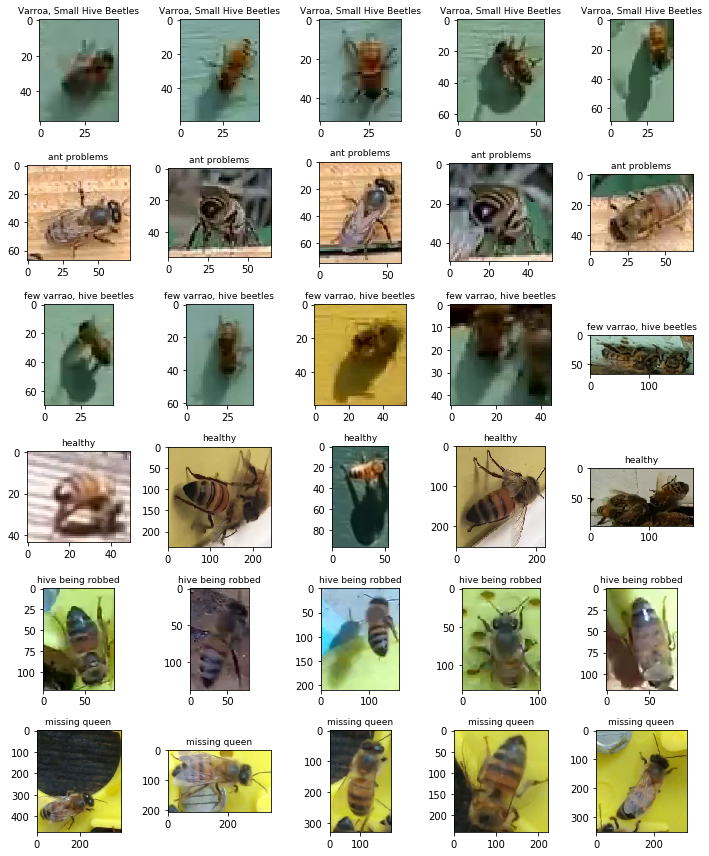

In [147]:
draw_category_images("health")

<div class="alert alert-warning">

<b>Menampilkan gambar lebah dengan masalah kesehatan</b> 

## <a id='36'>Pollen carying</a>   

Plotting lebah yang membawa serbuk sari.

In [148]:
tmp = honey_bee_df.groupby(['pollen_carrying'])['year'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

pollen_carrying  year  Images
0            False  2018    5154
1             True  2018      18

<div class="alert alert-warning">

<b>Lebah yang membawa serbuk sari hanya 0.34% dari keseluruhan data. Karena data tidak seimbang maka untuk fitur ini tidak akan diprediksi dan divisualisasikan</b> 

In [149]:
tmp = honey_bee_df.groupby(['pollen_carrying'])['subspecies'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df[df['pollen_carrying']==True]

pollen_carrying         subspecies  Images
7             True                 -1      12
8             True  Italian honey bee       6

<div class="alert alert-warning">

<b>Dari 0.34% data, 67% nya adalah species yang belum diketahui (-1) dan 33% nya adalah italian honey bee</b> 

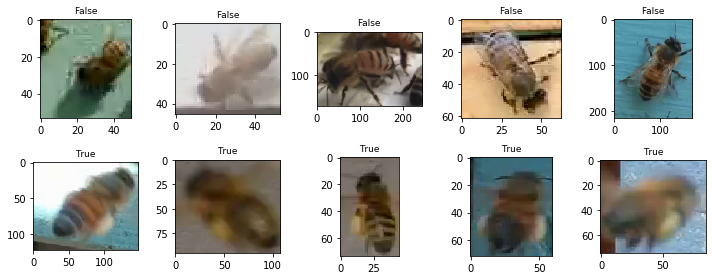

In [150]:
draw_category_images("pollen_carrying")

<div class="alert alert-warning">

<b>Gambar lebah yang membawa serbuk sari</b> 

## <a id='37'>Kasta</a>   

Plotting sebaran data kasta lebah.

In [151]:
honey_bee_df.groupby(['caste'])['caste'].nunique()

caste
worker    1
Name: caste, dtype: int64

<div class="alert alert-warning">

<b>Semua lebah pada klasifikasi CNN ini adalah tipe perkeja (worker) maka tidak perlu dibuat plotting sebaran datanya.</b> 

# <a id='4'>CONVOLUTIONAL NEURAL NETWORK</a>

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image. CNN adalah sebuah teknik yang terinspirasi dari cara mamalia — manusia, menghasilkan persepsi visual Secara garis besar Convolutional Neural Network (CNN) tidak jauh beda dengan neural network biasanya. CNN terdiri dari neuron yang memiliki weight, bias dan activation function. Convolutional layer juga terdiri dari neuron yang tersusun sedemikian rupa sehingga membentuk sebuah filter dengan panjang dan tinggi (pixels). CNN memanfaatkan proses konvolusi dengan menggerakan sebuah kernel konvolusi (filter) berukuran tertentu ke sebuah gambar, komputer mendapatkan informasi representatif baru dari hasil perkalian bagian gambar tersebut dengan filter yang digunakan.

* Feature Extraction Layer

Proses yang terjadi pada bagian ini adalah melakukan “encoding” dari sebuah image menjadi features yang berupa angka-angka yang merepresentasikan image tersebut (Feature Extraction). Feature extraction layer terdiri dari dua bagian yaitu Convolutional Layer dan Pooling Layer. Namun kadang ada beberapa riset/paper yang tidak menggunakan pooling.

* Convolutional Layer (Conv. Layer)

![](121.PNG)
Gambar tersebut menunjukkan RGB (Red, Green, Blue) gambar berukuran 32×32 pixel yang sebenarnya adalah multidimensional array dengan ukuran 32×32 pixel (3 adalah jumlah channel). Convolutional layer terdiri dari neuron yang tersusun sedemikian rupa sehingga membentuk sebuah filter dengan panjang dan tinggi (pixel). Sebagai contoh , layer pertama pada feature extraction layer adalah conv. layer dengan ukuran 5x5x3. Panjang 5 pixel, tinggi 5 pixel, dan tebal/jumlah 3 buah sesuai dengan channel dari gambar tersebut.Ketiga filter ini akan digeser keseluruhan bagian dari gambar. Setiap pergeseran akan dilakukan operasi “dot” antara input dan nilai dari filter tersebut sehinga menghasilkan sebuah output atau biasa disebut sebagai actvation map atau feature map.

* Stride

Stride adalah parameter yang menentukan berapa jumlah pergeseran filter. Jika nilai stride adalah 1, maka conv. filter akan bergeser sebanyak 1 pixel secara horizontal lalu vertical. Pada ilustrasi diatas, stride yang digunakan adalah 2. Semakin kecil stride maka akan semakin detail informasi yang kita dapatkan dari sebuah input, namun membutuhkan komputasi yang lebih jika dibandingkan dengan stride yang besar. Namun perlu diperhatikan bahwa dengan menggunakan stride yang kecil kita tidak selalu akan mendapatkan performa yang bagus.

* Padding

Padding atau zero padding adalah parameter menentukan jumlah pixel (berisi nilai 0) yang akan ditambhakan di setiap sisi dari input. Hal ini digunakan dengan tujuan untuk memanipulasi dimensi output dari conv. layer (feature map).

Dengan menggunakan padding, kita akan dapat mengukur dimensi output agar tetap sama seperti dimensi input atau setidaknya tidak berkurang secara drastis. Sehingga kita bisa menggunakan conv. layer yang lebih dalam sehingga lebih banyak feature yang berhasil di-extract. Meningkatkan performa model karena conv. layer akan fokus pada informasi yang sebenarnya yaitu yang berada diantara zero padding tersebut. Pada ilustrasi diatas, dimensi dari input sebenarnya adalah 5×5, jika dilakukan convolution dengan filter 3×3 dan stride sebesar 2, maka akan didaptkan feature map dengan ukuran 2×2. Namun jika ditambahkan zero padding sebanyak 1, maka feature map yang dihasilkan berukuran 3×3 (lebih banyak informasi yang dihasilkan). Untuk menghitung dimensi dari feature map kita bisa gunakan rumus sebagai berikut.

![](01.PNG)

* Fungsi Aktivasi

Fungsi aktivasi berada pada tahap sebelum melakukan pooling layer dan setelah melakukan proses konvolusi. Pada tahap ini, nilai hasil konvolusi dikenakan fungsi aktivasi atau activation function. Terdapat beberapa fungsi aktivasi yang sering digunakan pada convolutional network, di antaranya tanh() atau reLU. Aktivasi reLU menjadi pilihan bagi beberapa peneliti karena sifatnya yang lebih berfungsi dengan baik. Fungsi yang digunakan untuk aktivasi pada reLU, fungsi reLU adalah nilai output dari neuron bisa dinyatakan sebagai 0 jika inputnya adalah negatif. Jika nilai input dari fungsi aktivasi adalah positif, maka output dari neuron adalah nilai input aktivasi itu sendiri.

* Pooling Layer

Polling layer biasanya berada setelah conv. layer. Pada prinsipnya pooling layer terdiri dari sebuah filter dengan ukuran dan stride tertentu yang bergeser pada seluruh area feature map. Pooling yang biasa digunakan adalah Max Pooling dan Average Pooling. Tujuan dari penggunaan pooling layer adalah mengurangi dimensi dari feature map (downsampling), sehingga mempercepat komputasi karena parameter yang harus di update semakin sedikit dan mengatasi overfitting.

Hal terpenting dalam pembuatan model CNN adalah dengan memilih banyak jenis lapisan pooling. Hal ini dapat menguntungkan kinerja model (Lee, Gallagher, & Tu, 2015). Lapisan pooling bekerja di setiap tumpukan feature map dan mengurangi ukurannya. Bentuk lapisan pooling yang paling umum adalah dengan menggunakan filter berukuran 2×2 yang diaplikasikan dengan langkah sebanyak 2 dan kemudian beroperasi pada setiap irisan dari input. Bentuk seperti ini akan mengurangi feature map hingga 75% dari ukuran aslinya. Berikut gambar contoh operasi Max Pooling.

![](112.PNG)

Contoh Max Pooling
Lapisan pooling akan beroperasi pada setiap irisan kedalaman volume input secara bergantian. Pada gambar di atas, lapisan pooling menggunakan salah satu operasi maksimal yang merupakan operasi yang paling umum. Gambar diatas. menunjukkan operasi dengan langkah 2 dan ukuran filter 2×2. Dari ukuran input 4×4, pada masing-masing 4 angka pada input operasi mengambil nilai maksimalnya dan membuat ukuran output baru menjadi 2×2.

* Dropout Regularization

Dropout adalah teknik regularisasi jaringan syaraf dimana beberapa neuron akan dipilih secara acak dan tidak dipakai selama pelatihan. Neuron-neuron ini dapat dibilang dibuang secara acak. Hal ini berarti bahwa kontribusi neuron yang dibuang akan diberhentikan sementara jaringan dan bobot baru juga tidak diterapkan pada neuron pada saat melakukan backpropagation.

Dropout merupakan proses mencegah terjadinya overfitting dan juga mempercepat proses learning. Dropout mengacu kepada menghilangkan neuron yang berupa hidden mapun layer yang visible di dalam jaringan. Dengan menghilangkan suatu neuron, berarti menghilangkannya sementara dari jaringan yang ada. Neuron yang akan dihilangkan akan dipilih secara acak. Setiap neuron akan diberikan probabilitas yang bernilai antara 0 dan 1.

* Confusion Matrix

Salah satu metode untuk mengukur performa dari suatu model klasifikasi adalah dengan mencari nilai precision, recall, serta nilai akurasi dari suatu model. Beberapa istilah yang umum dipakai dalam pengukuran kinerja model klasifikasi adalah positive tupple dan negative tupple. Positive tupple adalah tupple yang menjadi fokus pembahasan. Sedangkan negative tupple adalah tupple selain yang sedang menjadi fokus pembahasan. 
Beberapa istilah lain yang merupakan dasar dalam pencarian nilai precision, recall, dan akurasi nilai true positive (TP), true-negative (TN), false positive (FP), dan false negative (FN). Istilah-istilah tersebut biasa dirangkum sebagai suatu matriks yang disebut confusion matrix sebagaimana ditunjukkan pada berikut.

![](009.PNG)

Pada gambar tersebut ditunjukkan, nilai true positive didefinisikan sebagai positive tupple yang diklasifikasikan dengan benar oleh model. True negative adalah negative tupple yang diklasifikasikan dengan benar oleh model. Sementara itu, false positive adalah negative tupple yang diklasifikasikan sebagai kelas positif oleh model. False negative adalah positive tupple yang diklasifikasikan sebagai kelas negatif oleh model klasifikasi. Berdasar confusion matrix pada gambar tersebut, kinerja model klasifikasi dapat dihitung.

* Akurasi

Akurasi didefinisikan sebagai persentase dari data uji yang diklasifikasikan ke kelas yang benar. Akurasi dapat dinyatakan dalam persamaan berikut.

![](900.PNG)

## <a id='40'>Splitting data</a>  

<div class="alert alert-warning">

<b>Dataset displitting menjadi 80% traning dan 20% testing. Penggunaan random_state adalah memastikan reproduksifitas hasil.</b> 

In [45]:
train_df, test_df = train_test_split(honey_bee_df, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [46]:
train_df, val_df = train_test_split(train_df, test_size=VAL_SIZE, random_state=RANDOM_STATE)

<div class="alert alert-warning">

<b>Selanjutnya adalah splitting data train dan validasi. Validasi data diperlukan untuk memvalidasi hasil train dan untuk mengetahui seberapa baik pembelajaran dari data traning, dari data train diambil 20% untuk validasi data</b> 

In [47]:
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))
print("Val   set rows: {}".format(val_df.shape[0]))

Train set rows: 3309
Test  set rows: 1035
Val   set rows: 828


<div class="alert alert-warning">

<b>Jumlah data setelah splitting untuk train, test dan validasi.</b>

## <a id='41'>Membangun model basline (simple)</a>    

<div class="alert alert-warning">

<b>Percobaan pertama adalah dengan membuat model sederhana. Langkah selanjutnya dalam pembuatan model prediksi. Dengan model sederhana, kita bisa mendapatkan wawasan yang cepat tentang seberapa baik data memprediksi nilai target . Melihat hasil pelatihan (kesalahan dan akurasi pelatihan, kesalahan validasi dan akurasi), kita dapat memahami jika kita perlu menambahkan lebih banyak data (karena akurasi pelatihan kecil) atau jika perlu mengoptimalkan model (dengan menambahkan lebih banyak konvolusional lapisan) atau jika perlu menambahkan lapisan Dropout (karena kesalahan validasi meningkat setelah beberapa langkah - model overfitting) dll. Fungsi untuk membaca gambar dari file gambar, skala semua gambar hingga 100 x 100 x 3 (saluran).</b>

In [65]:
def read_image(file_name):
    image = skimage.io.imread(IMAGE_PATH + file_name)
    image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), mode='reflect')
    return image[:,:,:IMAGE_CHANNELS]

In [66]:
def categories_encoder(dataset, var='subspecies'):
    X = np.stack(dataset['file'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [67]:
X_train, y_train = categories_encoder(train_df)
X_val, y_val = categories_encoder(val_df)
X_test, y_test = categories_encoder(test_df)

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.

C:\Users\ikik\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling

In [68]:
model1=Sequential()
model1.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model1.add(MaxPool2D(MAX_POOL_DIM))
model1.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model1.add(Flatten())
model1.add(Dense(y_train.columns.size, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Penjelasan model CNN simple.  

Elemen model CNN: 
* `layer 1 konvolusi  dengan 16 filter dari 3 dimensi gambar (channel), fungsi aktivasi='relu'`;  
    * rumus relu : f(x) = max( 0, x)
* `layer 2 maxpoll2d layer, dengan 2 faktor reduksi 'padding=same'`;  
* `layer 3 konvolusi dengan 16 filter dari 3 dimensi gambar (channel), fungsi aktivasi='relu'`;  
* `flatten layer`;  
* `layer dense menggunakan aktivasi softmax karena output merupakan multiclass classification`; 
* `Optimizer yang digunakan adalah 'adam' dan loss function digunakan categorical crossentropy sedangkan metrics digunakan accuracy`; 


In [ ]:
model1.summary()

In [183]:
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)

In [184]:
train_model1  = model1.fit_generator(image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        epochs=NO_EPOCHS_1,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/BATCH_SIZE)

Epoch 1/5
104/103 [==============================] - 36s 345ms/step - loss: 0.8687 - acc: 0.7166 - val_loss: 0.6650 - val_acc: 0.7367
Epoch 2/5
104/103 [==============================] - 34s 325ms/step - loss: 0.4925 - acc: 0.8161 - val_loss: 0.4370 - val_acc: 0.8382
Epoch 3/5
104/103 [==============================] - 34s 324ms/step - loss: 0.4191 - acc: 0.8364 - val_loss: 0.3569 - val_acc: 0.8599
Epoch 4/5
104/103 [==============================] - 33s 322ms/step - loss: 0.3997 - acc: 0.8463 - val_loss: 0.3548 - val_acc: 0.8599
Epoch 5/5
104/103 [==============================] - 34s 326ms/step - loss: 0.3193 - acc: 0.8689 - val_loss: 0.2847 - val_acc: 0.8804


Model pertama di train `menggunakan fit_generator` dengan  `batch size` dan epoch yang sudah didefinisikan sebelumnya, percobaan pertama menggunakan 5 epoch. 

## <a id='42'>Evaluasi model</a> 

In [185]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model1)

C:\Users\ikik\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<div class="alert alert-warning">

<b>Hasil plotting akurasi dan loss pada model pertama.</b>

In [186]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2910870792209238
Test accuracy: 0.8753623191285248



Evaluasi data **test** set **loss** and **accuracy**. data yang digunakan adalah data test.

In [187]:
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])

In [188]:
test_accuracy_report(model1)

                       precision    recall  f1-score   support

                   -1       0.89      0.81      0.85        80
1 Mixed local stock 2       0.80      0.17      0.28        96
  Carniolan honey bee       0.95      1.00      0.98       102
    Italian honey bee       0.85      0.98      0.91       601
    Russian honey bee       0.93      0.99      0.96        98
VSH Italian honey bee       0.94      0.61      0.74        49
    Western honey bee       1.00      0.78      0.88         9

            micro avg       0.88      0.88      0.88      1035
            macro avg       0.91      0.76      0.80      1035
         weighted avg       0.87      0.88      0.85      1035

Loss function: 0.2910870792209238, accuracy: 0.8753623191285248


<div class="alert alert-warning">

<b>Akurasi per-kelas lebah.</b>

Model simple menggunakan 20% data testing terpisah. Dari data traning, 80% digunakan untuk traning aktual/data aktual sedangkan 20% untuk testing. Data tidak seimbang dengan kelas subspecies. Akurasi dari training pada saat menggunakan 5 epochs hanya **87.53%** dan loss **29.10%**, akurasi validasi berkisar **89%**, loss menuru hingga **2.7%** setelah epoch ke-3.

Percobaan Selanjutnya :

* Menambahkan layer dropout
* introduce strides
* modifikasi learning rate selama traning

## <a id='43'>Menambahkan Dropout layer</a>  

Model ditambahkan 2 dropout layer, kegunaan dari dropout layer adalah me-reduce overfitting yang mungkin terjadi, dengan dropping dan epoch traning.

`Model akan menjadi seperti dibawah :`

In [60]:
model2=Sequential()
model2.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model2.add(MaxPool2D(MAX_POOL_DIM))
# Add dropouts to the model
model2.add(Dropout(0.4))
model2.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
# Add dropouts to the model
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(y_train.columns.size, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

`Model setelah ditambahkan dropout`

In [61]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 280007    
Total para

`Bentuk dari model + dropout (0.4)`

In [62]:
train_model2  = model2.fit_generator(image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        epochs=NO_EPOCHS_2,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/BATCH_SIZE)

Epoch 1/10
104/103 [==============================] - 42s 400ms/step - loss: 1.1458 - acc: 0.6318 - val_loss: 0.9975 - val_acc: 0.6691
Epoch 2/10
104/103 [==============================] - 39s 379ms/step - loss: 0.7862 - acc: 0.7162 - val_loss: 0.9258 - val_acc: 0.6449
Epoch 3/10
104/103 [==============================] - 40s 385ms/step - loss: 0.5509 - acc: 0.7841 - val_loss: 0.5045 - val_acc: 0.7983
Epoch 4/10
104/103 [==============================] - 40s 381ms/step - loss: 0.4798 - acc: 0.8123 - val_loss: 0.4377 - val_acc: 0.8394
Epoch 5/10
104/103 [==============================] - 39s 378ms/step - loss: 0.4159 - acc: 0.8299 - val_loss: 0.4725 - val_acc: 0.8116
Epoch 6/10
104/103 [==============================] - 40s 385ms/step - loss: 0.3909 - acc: 0.8376 - val_loss: 0.3443 - val_acc: 0.8502
Epoch 7/10
104/103 [==============================] - 40s 381ms/step - loss: 0.3433 - acc: 0.8555 - val_loss: 0.3206 - val_acc: 0.8708
Epoch 8/10
104/103 [==============================] - 3

### Evaluate model accuracy and loss

In [63]:
plot_accuracy_and_loss(train_model2)

### Test accuracy and loss

In [64]:
test_accuracy_report(model2)

                       precision    recall  f1-score   support

                   -1       0.90      0.82      0.86        80
1 Mixed local stock 2       0.85      0.23      0.36        96
  Carniolan honey bee       0.98      0.97      0.98       102
    Italian honey bee       0.88      0.97      0.92       601
    Russian honey bee       0.90      0.99      0.94        98
VSH Italian honey bee       0.82      0.86      0.84        49
    Western honey bee       1.00      0.89      0.94         9

            micro avg       0.89      0.89      0.89      1035
            macro avg       0.90      0.82      0.83      1035
         weighted avg       0.89      0.89      0.87      1035

Loss function: 0.2943501279549898, accuracy: 0.8879227053140096


Setelah ditambahkan dropout, model memiliki akurasi sebesar **88.79%** dengan loss **29.43%**. 

Fitur yang ditambahkan :

* Menambahkan 2 dropout layer
* Epoch ditambahkan menjadi 10

## <a id='45'>Perbaikan model</a>  

Pada percobaan ke-3 ini ditambahkan kondisi `early stopping` dimana ini berarti memberhentikan traning ketika akurasi yang didapat tidak dapat ditingkatkan lagi.

Ditambahkan juga `saving model` untuk checkpoint setelah akurasi ditingkatkan, jika akurasi tidak meningkat, model tidak disimpan. Model akan disimpan ketika mencata akurasi terbaik. 



In [65]:
annealer3 = LearningRateScheduler(lambda x: 1e-3 * 0.995 ** (x+NO_EPOCHS_3))
earlystopper3 = EarlyStopping(monitor='loss', patience=PATIENCE, verbose=VERBOSE)
checkpointer3 = ModelCheckpoint('best_model_3.h5',
                                monitor='val_acc',
                                verbose=VERBOSE,
                                save_best_only=True,
                                save_weights_only=True)

In [66]:
model3=Sequential()
model3.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model3.add(MaxPool2D(MAX_POOL_DIM))
# Add dropouts to the model
model3.add(Dropout(0.4))
model3.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
# Add dropouts to the model
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(y_train.columns.size, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

`Model setelah ditambahkan early stopping dan 50 epoch`

In [67]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 280007    
Total para

`Train model perbaikan`

In [68]:
train_model3  = model3.fit_generator(image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        epochs=NO_EPOCHS_3,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        callbacks=[earlystopper3, checkpointer3, annealer3])

Epoch 1/50
104/103 [==============================] - 40s 386ms/step - loss: 1.2482 - acc: 0.6224 - val_loss: 1.0262 - val_acc: 0.6582

Epoch 00001: val_acc improved from -inf to 0.65821, saving model to best_model_3.h5
Epoch 2/50
104/103 [==============================] - 40s 386ms/step - loss: 0.7686 - acc: 0.7191 - val_loss: 0.6281 - val_acc: 0.7899

Epoch 00002: val_acc improved from 0.65821 to 0.78986, saving model to best_model_3.h5
Epoch 3/50
104/103 [==============================] - 40s 385ms/step - loss: 0.5510 - acc: 0.7888 - val_loss: 0.5958 - val_acc: 0.7850

Epoch 00003: val_acc did not improve from 0.78986
Epoch 4/50
104/103 [==============================] - 40s 383ms/step - loss: 0.4470 - acc: 0.8185 - val_loss: 0.4696 - val_acc: 0.8309

Epoch 00004: val_acc improved from 0.78986 to 0.83092, saving model to best_model_3.h5
Epoch 5/50
104/103 [==============================] - 40s 387ms/step - loss: 0.4060 - acc: 0.8309 - val_loss: 0.3880 - val_acc: 0.8514

Epoch 00005:

### Model accuracy and loss

In [69]:
plot_accuracy_and_loss(train_model3)

### Test accuracy and loss

In [70]:
test_accuracy_report(model3)

                       precision    recall  f1-score   support

                   -1       0.88      0.89      0.88        80
1 Mixed local stock 2       0.58      0.91      0.71        96
  Carniolan honey bee       0.91      1.00      0.95       102
    Italian honey bee       0.97      0.86      0.91       601
    Russian honey bee       0.95      1.00      0.98        98
VSH Italian honey bee       0.93      0.88      0.91        49
    Western honey bee       1.00      0.78      0.88         9

            micro avg       0.90      0.90      0.90      1035
            macro avg       0.89      0.90      0.89      1035
         weighted avg       0.92      0.90      0.90      1035

Loss function: 0.25196382774822956, accuracy: 0.8956521739130435


Akurasi dan loss setelah percobaan ke-3. Akurasi meningkat menjadi **89.56%** dan loss **25.19%**, Penambahan epoch sangat berpengaruh pada akurasi. Early stopping sangat berguna untuk mengefesiensikan waktu traning. Diatas merupakan akurasi dari lebah yang akan diklasifikasi. Terdapat `precision` , `recall`, `f1-score`, `support` dan rata-rata `micro`, `macro` dan `weighted`

# <a id='6'>KESIMPULAN</a>  

Setelah ekspolarasi data, dibuat `model ke-1` (baseline), Hasil dari basline model berdasarkan analisis bias dan varian namun terjadi overfitting, lalu ditambahkan dropout pada `Model ke-2` untuk mengatasi masalah ini. Menambahkan dropout meningkatkan performa untuk mereduce/meredam overfitting. `Model ke-3` merupakan penyesuaian learning rate, early stopping berdasaarkan akurasi validasi dan menyimpan model dengan akurasi terbaik, dengan model ini akurasi dari prediksi akan selalu ditingkatkan.

Akurasi yang didapat dari ke-3 model percobaan CNN :

* `Model ke-1 = 87,53%`, Penerapan model baseline (simple).
* `Model ke-2 = 88,79%`, Penambahan dropout dan epoch.
* `Model ke-3 = 89.56%`, Penambahan early stopping, epoch, autosave model dan penyesuaian learning rate.

<a href="#0"><font size="1">kembali ke atas</font></a>  

# <a id='6'>CATATAN</a>  

### **Kemungkinan seluruh Grafik diatas tidak dapat tampil tanpa koneksi internet dan backend tensorflow karena menggunakan modul ploty sebagai plotting grafik.**